# Computação Científica 1 - 2023.2 - Prof. Adriano Côrtes

## Teste 1

***

### Questão 1
Explique o comportamento (surpreendente?) do código abaixo

In [ ]:
d = 8
e = 2
from math import *
sqrt(d ** e)

16.88210319127114

Quando importamos o módulo _math_ depois de declarar as variáveis a serem usadas, o erro inesperado ocorre. Abaixo vemos como o comportamento é corrigo pela correta importação.

In [ ]:
e == 2

False

In [ ]:
from math import *
d = 8
e = 2
sqrt(d ** e)

8.0

Isso indica que uma das variáveis é redeclarada com a importação de _math_, sendo ela, *"e"* que recebe o valor de *"math.e"* (número de euler)

***

### Questão 2
Como sabemos números reais são representados no computador por números de precisão finita, os números em ponto-flutuante. No Python, assim como na maioria das outras linguagens de programação predomina o padrão IEEE-754, em particular a representação em precisão dupla (*double precision*) é o default em Python. Podemos investigar essas informações por meio do módulo `sys`. Essas informações estão atributo `sys.float_info`:

In [ ]:
import sys
print(sys.float_info)
print('O menor número representável em ponto-flutuante de precisão dupla é {}'.format(sys.float_info.min))
print('O maior número representável em ponto-flutuante de precisão dupla é {}'.format(sys.float_info.max))

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)
O menor número representável em ponto-flutuante de precisão dupla é 2.2250738585072014e-308
O maior número representável em ponto-flutuante de precisão dupla é 1.7976931348623157e+308


1. O que acontece se você tentar avaliar a expressão $e^{1000}$ que gera um número maior que o maior número representável?
2. Como você calcularia a hipotenusa $c$ de um triângulo retângulo cujos catetos são $a = 1.5 \times 10^{200}$ e $b = 3.5 \times 10^{201}$? **Note que calcular $a^2$ e $b^2$ não é uma opção, como no item anterior**. Verifique seu resultado usando a função `math.hypot`

1. O seguinte erro aparece quando extrapolamos o maior número representável:

In [ ]:

from math import *
x = 1000
print(pow(e, x))

# OverflowError: math range error

'\nfrom math import *\nx = 1000\nprint(pow(e, x)) \n\n'

***

2.

In [ ]:
from math import *

a = 1.5 * (10**200)
b = 3.5 * (10**201)
c = hypot(a,b)

# Matemáticamente podemos ignorar a expoente
# (ambos com expoente em base 201)
A = 0.15
B = 3.5

C = sqrt(pow(A,2) + pow(B,2))

BASE = 10**201

c == C*BASE



True

### Questão 3
Usando uma tupla de strings com o nome dos dígitos de $0$ a $9$, crie um trecho de código em Python que imprima até a sétima casas decimais de $\pi$ na forma de texto, como:

`três ponto um quatro um cinco nove dois seis`

In [ ]:
from math import *

APPROX = 8
PI = str(pi)[:APPROX]

algarisms = ('zero','um','dois',
 'três','quatro','cinco',
 'seis','sete','oito','nove')

def algarism_dict_function():
  algarism_dict = {}
  c = 0
  while c <=9:
    algarism_dict[str(c)] = algarisms[c]
    c+=1
  algarism_dict['.'] = 'ponto'
  return algarism_dict


algarisms_dict = algarism_dict_function()


def main(x):
  return ' '.join([algarisms_dict[i] for i in PI])



main(PI)

'três ponto um quatro um cinco nove dois'

***

### Questão 4
Escreva um trecho que código Python que imprima de maneira formatada (bonitinha) as oito primeiro linhas do triângulo de Pascal.

In [ ]:
from math import *

ROWS = 8

def n_choose_k(n,k):
  return str(int(factorial(n)/(factorial(n-k)*factorial(k))))

def pascal_triangle(rows):
  data = {}
  for i in range(rows):
    data[i] = ([n_choose_k(i, j) for j in range(i+1)])
  return data

def main():
  triangle = pascal_triangle(ROWS)
  print('\n'.join([' '.join(triangle[i]) for i in triangle]))


main()

1
1 1
1 2 1
1 3 3 1
1 4 6 4 1
1 5 10 10 5 1
1 6 15 20 15 6 1
1 7 21 35 35 21 7 1


***

### Questão 5
1. Crie uma função que receba como entrada um número inteiro $N$ e retorna uma lista com os primeiros $N$ números de Fibonacci.
2. A chamada [*lei de Benford*](https://pt.wikipedia.org/wiki/Lei_de_Benford) é uma lei baseada na observação sobre a frequência do primeiro dígito $d \in \{1,2,\ldots,9\}$ de uma determinada coleção de números (*data sets*). Segundo essa lei a distribuição logaritmica, portanto não-uniforme, dada por $$P(d) = \log_{10} \left( \dfrac{d+1}{d} \right),$$ ou seja, número começando com $1$ são mais frequentes que os começando com $2$, e assim em diante, com efeito temos aproximadamente

| $d$ | $P(d)$ |
|-----|--------|
|1    | 0.301  |
|2    | 0.176  |
|3    | 0.125  |
|4    | 0.097  |
|5    | 0.079  |
|6    | 0.067  |
|7    | 0.058  |
|8    | 0.051  |
|9    | 0.046  |

Usando a função criada no item anterior calcule a distribuição dos primeiros dígitos da sequência de Fibonacci para $N=500$ e $N=1000$, e avalie se ela segue a lei de Benford.

In [ ]:
# O(2^n)
def fib(n):
  if n <= 1:
    return n
  else:
    return fib(n-1) + fib(n-2)

# O(n)
def fib_memo(n, memo={}):
  if n in memo:
    return memo[n]
  elif n <= 1:
    return n
  else:
    result = fib_memo(n-1, memo) + fib_memo(n-2, memo)
    memo[n] = result
    return result

# O(n) with list
def fib_iterative(n):
  if n <= 1:
    return n

  fib = [0,1]
  for i in range(2, n+1):
    fib.append(fib[i-1]+fib[i-2])

  return fib

In [ ]:
from math import *
def benford():
  table = {}
  for d in range(1,10):
    table[str(d)] = log10((d+1)/d)
  return table

benford_table = benford()
benford_table

{'1': 0.3010299956639812,
 '2': 0.17609125905568124,
 '3': 0.12493873660829992,
 '4': 0.09691001300805642,
 '5': 0.07918124604762482,
 '6': 0.06694678963061322,
 '7': 0.05799194697768673,
 '8': 0.05115252244738129,
 '9': 0.04575749056067514}

In [ ]:
num_500 = fib_iterative(500)
num_1000 = fib_iterative(1000)

In [ ]:
REF = benford_table


keys = list(str(i) for i in range(1,10))
values = list(0 for i in range(1,10))

counter = dict(zip(keys, values))

def main(lst):
  for i in range(len(lst)):
    digit = str(lst[i])[0]
    if digit in counter:
      counter[digit] += 1

  for i in keys:
    counter[i] = counter[i]/len(lst)

  return counter

A = main(num_500)
B = main(num_1000)


In [ ]:
A

{'1': 0.30100039680878005,
 '2': 0.17699865005254226,
 '3': 0.12500074775523878,
 '4': 0.09599781456068882,
 '5': 0.0799998404788824,
 '6': 0.06699886939407897,
 '7': 0.05600188234918774,
 '8': 0.05300089132424462,
 '9': 0.044998913262386316}

In [ ]:
B

{'1': 0.30100039680878005,
 '2': 0.17699865005254226,
 '3': 0.12500074775523878,
 '4': 0.09599781456068882,
 '5': 0.0799998404788824,
 '6': 0.06699886939407897,
 '7': 0.05600188234918774,
 '8': 0.05300089132424462,
 '9': 0.044998913262386316}

<function matplotlib.pyplot.show(close=None, block=None)>

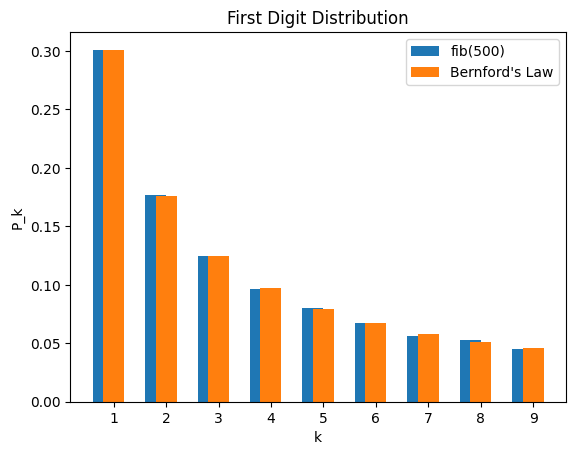

In [ ]:
import matplotlib.pyplot as plt

keys_A = list(A.keys())
keys_B = list(REF.keys())

values_A = list(A.values())
values_B = list(REF.values())

fig, ax = plt.subplots()

pos_A = range(len(keys_A))
pos_B = [p + 0.2 for p in pos_A]

ax.bar(pos_A, values_A, width=0.4, label='fib(500)')
ax.bar(pos_B, values_B, width=0.4, label="Bernford's Law")

ax.set_xticks([p + 0.2 for p in pos_A])
ax.set_xticklabels(keys_A)
ax.set_xlabel('k')
ax.set_ylabel('P_k')
ax.set_title("First Digit Distribution")
ax.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

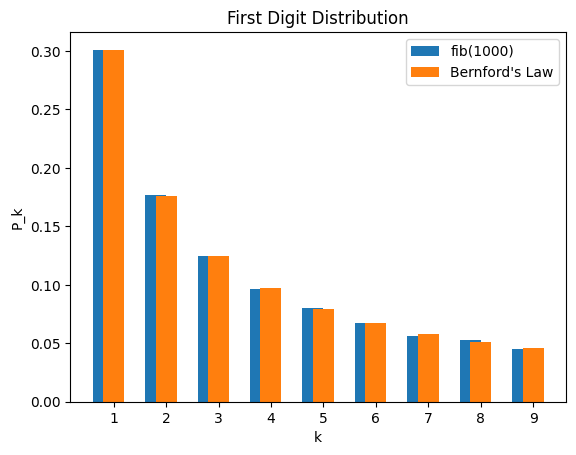

In [ ]:
import matplotlib.pyplot as plt

keys_A = list(B.keys())
keys_B = list(REF.keys())

values_A = list(B.values())
values_B = list(REF.values())

fig, ax = plt.subplots()

pos_A = range(len(keys_A))
pos_B = [p + 0.2 for p in pos_A]

ax.bar(pos_A, values_A, width=0.4, label='fib(1000)')
ax.bar(pos_B, values_B, width=0.4, label="Bernford's Law")

ax.set_xticks([p + 0.2 for p in pos_A])
ax.set_xticklabels(keys_A)
ax.set_xlabel('k')
ax.set_ylabel('P_k')
ax.set_title("First Digit Distribution")
ax.legend()

plt.show

***

### Questão 6
Escreva um loop usando `while` para calcular a [média aritmética-geometrica](https://en.wikipedia.org/wiki/Arithmetic%E2%80%93geometric_mean) (AGM) de dois números reais positivos, $x$ e $y$, definida como o limite das sequência:

$$
\begin{align}
a_{n+1} &= \frac{1}{2} (a_n + g_n), \\
g_{n+1} &= \sqrt{a_n g_n},
\end{align}
$$

começando com $a_0 = x$ e $g_0 = y$. Ambas as sequências convergem para o mesmo número, denotado por $\textrm{agm}(x,y)$. Use sua implementação para calcular a constante de *Gauss*, $G = 1/\textrm{agm}(1,\sqrt{2})$.

**Importante:** Você terá que usar um critério de parada para iteração.

In [ ]:
from math import *

STOP = 100

def a_mean(x,y):
  return (1/2)*(x+y)

def g_mean(x,y):
  return sqrt(x*y)

def agm(x,y):
  c = 1
  AG = {0: [x,y]}

  a,g = x,y

  while c <= STOP:
    temp_a = a_mean(a,g)

    g = g_mean(a,g)
    a = temp_a

    AG[c] = [a,g]

    c+=1

  return AG[STOP][0]

# Constante de Gauss
G = 1/(agm(1,sqrt(2)))
print(G)


0.8346268416740731


***